Importa o modelo a ser fatiado e mapeado

In [21]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/Downloads/Tangran3/TangranV2/input/stl_models/conecomplicado90.stl
Second arg: 300.0
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/input/sliced
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -25, model zmax = 100, first plane Z = -26.996, number of planes = 65
-Incremental, conecomplicado90.stl, thickness = 2, #T = 1140, #P = 63, #S = 11177, 0.002327s (slicing), 0.016393s (polygon assembling), 0.069005s (total), *K: 9.80439


rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing image: ../input/sliced/layer_012.pgm


writing image: ../input/sliced/layer_013.pgm


writing image: ../input/sliced/layer_014.pgm


writing image: ../input/sliced/layer_015.pgm


writing image: ../input/sliced/layer_016.pgm


writing image: ../input/sliced/layer_017.pgm


writing image: ../input/sliced/layer_018.pgm


writing image: ../input/sliced/layer_019.pgm


writing image: ../input/sliced/layer_020.pgm


writing ima

Paredes Finas

In [22]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 2.937410593032837
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0005695819854736328
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.03679943084716797
Total de [Fase 1: Camada: 0] : 3.024379014968872
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 2.9289751052856445
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0007774829864501953
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.0261380672454834
Total de [Fase 1: Camada: 1] : 2.996718406677246
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 3.0410730838775635
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0006258487701416016
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.03409266471862793
Total de [Fase 1: Camada: 2] : 3.1287453

Contornos

In [23]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 0.7841699123382568
Criando os loops
Total de [Criando os loops] : 0.35992431640625
Criando regiões de influência
Total de [Criando regiões de influência] : 0.030152559280395508
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.10129594802856445
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:19 maior void:0.002509410288582183Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
Total de [Retirando regiões da camada] : 0.2630603313446045
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.03287935256958008
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.19879722595214844
Total de [Fase 2: Camada: 0] : 1.8292651176452637
Fa

Pontes

In [24]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.3175318241119385
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 7.282789945602417
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.04891085624694824
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.02100205421447754
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.002157926559448242
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.18590974807739258
Total de [Fase 3: Camada: 0] : 8.93245267868042
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.312340259552002
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 7.1008219718933105
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossove

Zigzags

In [25]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.7723450660705566
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.00609135627746582
Total de [Fase 4: Camada: 0] : 0.8759827613830566
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.737725019454956
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.007806062698364258
Total de [Fase 4: Camada: 1] : 0.8224339485168457
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.726966381072998
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.006031990051269531
Total de [Fase 4: Camada: 2] : 0.8135793209075928
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.7349867820739746
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.006009578704833984
Total de [Fase 4: Camada: 3] : 0.829502820968

iMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.38484716415405273
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.3648509979248047
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.3787710666656494
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.3939018249511719
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.37070298194885254
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.37792301177978516
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.3500711917877197
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.3580777645111084
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.35973286628723145
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.3705432415008545
Fase 4: Camada: 10


Total de [Fase 4: Camada: 10] : 0.6819417476654053
Fase 4: Camada: 11


Total de [Fase 4: Camada: 11] : 0.3738131523132324
Fase 4: Camada: 12


Total de [Fase 4: Camada: 12] : 0.3526310920715332
Fase 4: Camada: 13


Total de [Fase 4: Camada: 13] : 0.3837707042694092
Fase 4: 

/tmp/ipykernel_335468/2909573810.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()




Total de [Fase 4: Camada: 20] : 0.34732508659362793
Fase 4: Camada: 21


Total de [Fase 4: Camada: 21] : 0.33188438415527344
Fase 4: Camada: 22


Total de [Fase 4: Camada: 22] : 0.3370194435119629
Fase 4: Camada: 23


Total de [Fase 4: Camada: 23] : 0.3272075653076172
Fase 4: Camada: 24


Total de [Fase 4: Camada: 24] : 0.34244465827941895
Fase 4: Camada: 25


Total de [Fase 4: Camada: 25] : 0.3413350582122803
Fase 4: Camada: 26


Total de [Fase 4: Camada: 26] : 0.37564682960510254
Fase 4: Camada: 27


Total de [Fase 4: Camada: 27] : 0.36182594299316406
Fase 4: Camada: 28


Total de [Fase 4: Camada: 28] : 0.3550388813018799
Fase 4: Camada: 29


Total de [Fase 4: Camada: 29] : 0.3390226364135742
Fase 4: Camada: 30


Total de [Fase 4: Camada: 30] : 0.34351301193237305
Fase 4: Camada: 31


Total de [Fase 4: Camada: 31] : 0.4343540668487549
Fase 4: Camada: 32


Total de [Fase 4: Camada: 32] : 0.39341211318969727
Fase 4: Camada: 33


Total de [Fase 4: Camada: 33] : 0.3751363754272461
Fase

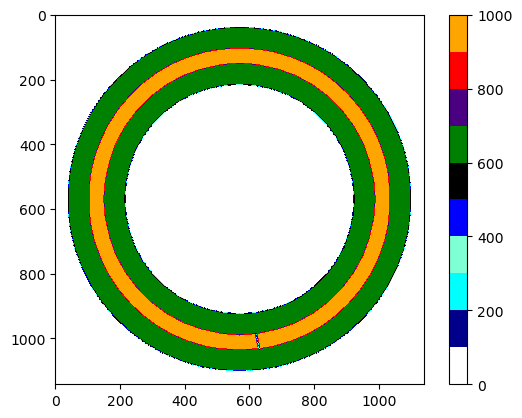

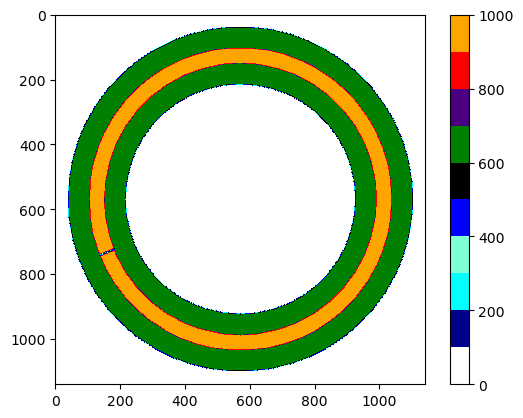

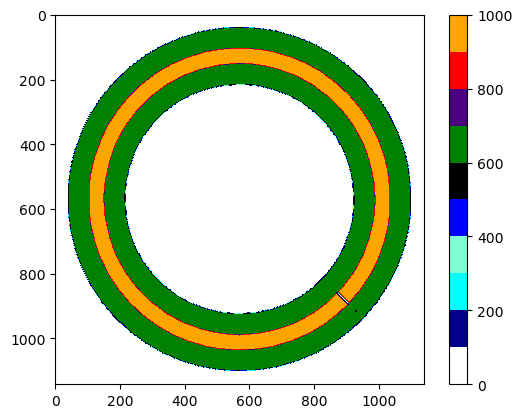

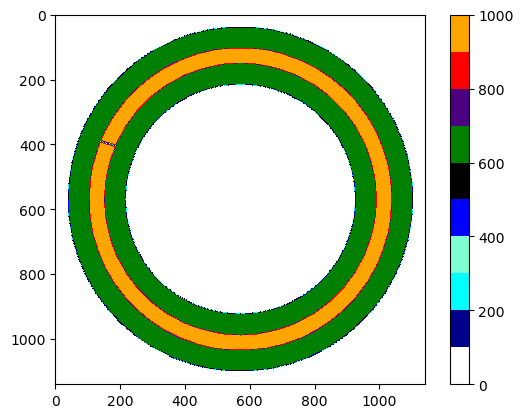

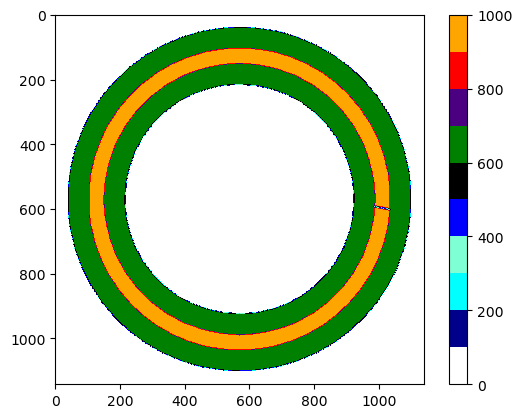

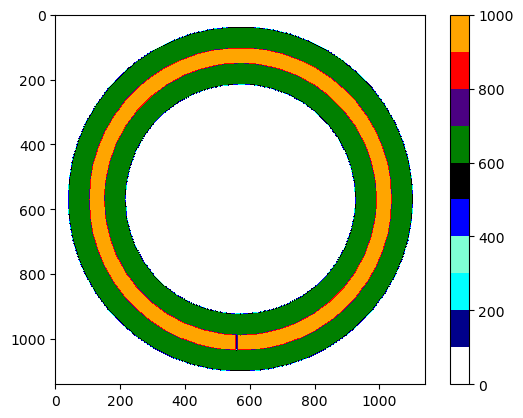

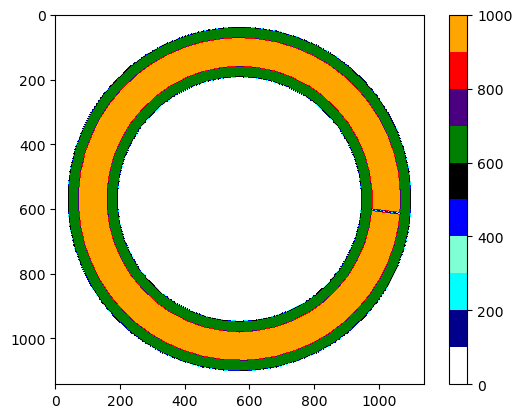

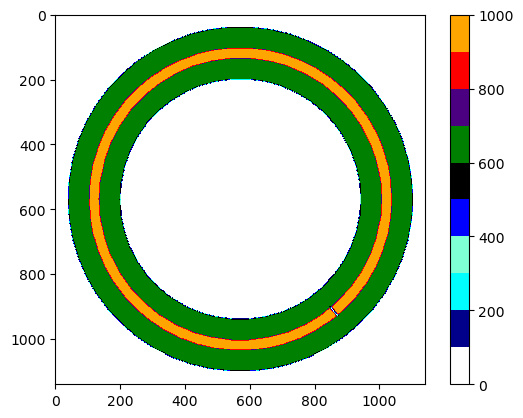

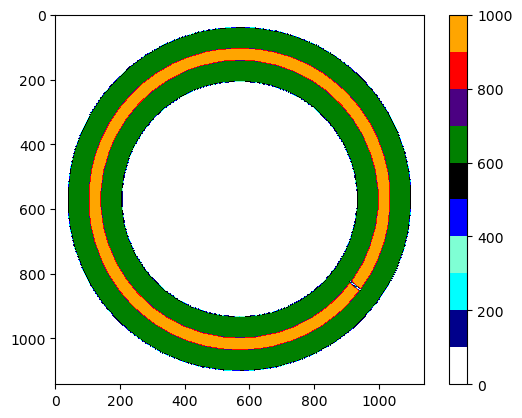

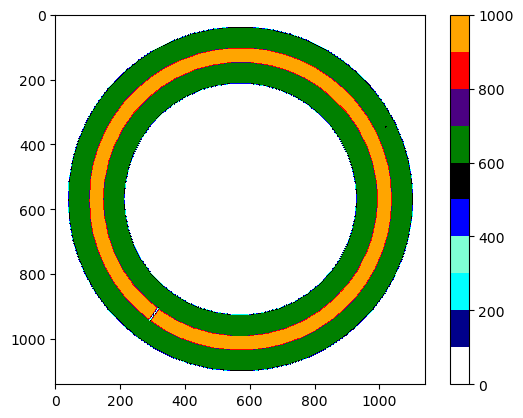

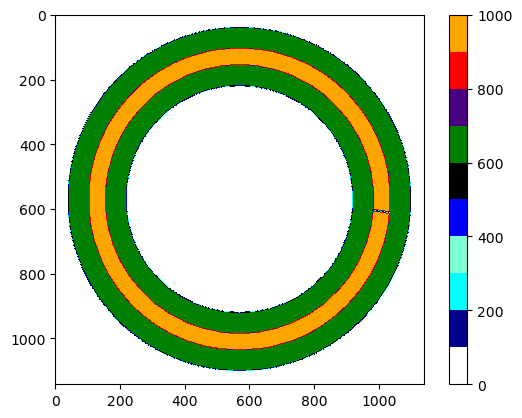

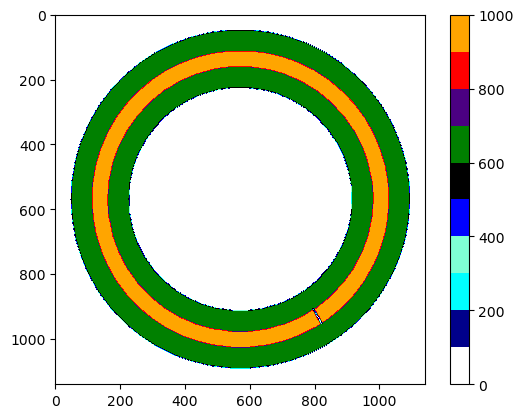

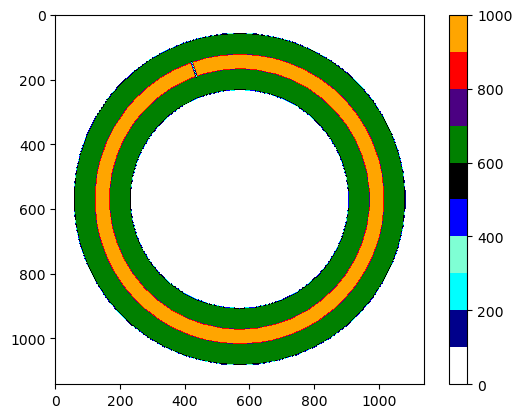

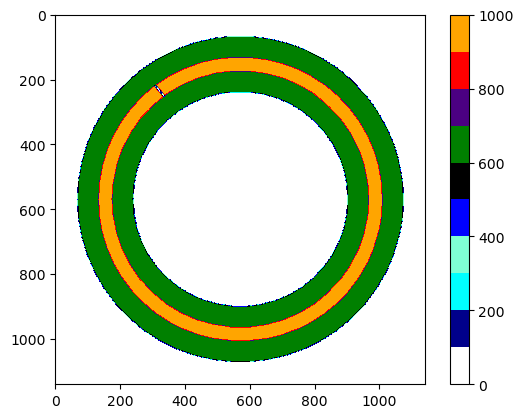

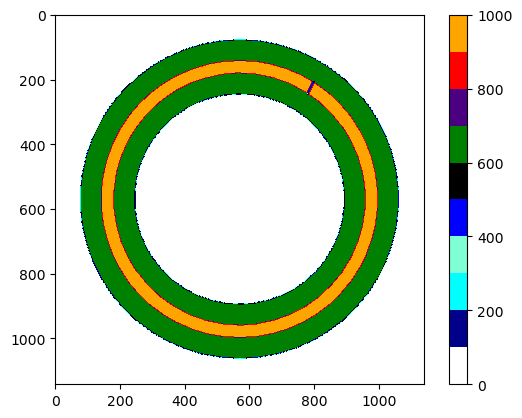

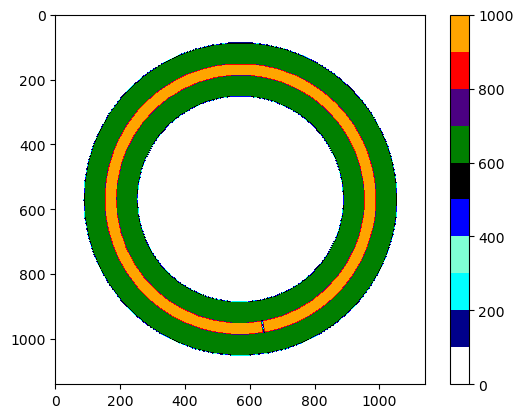

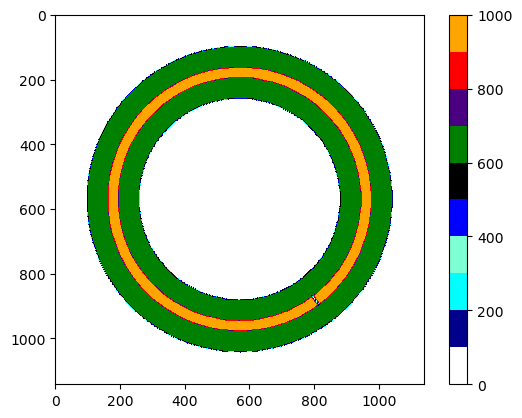

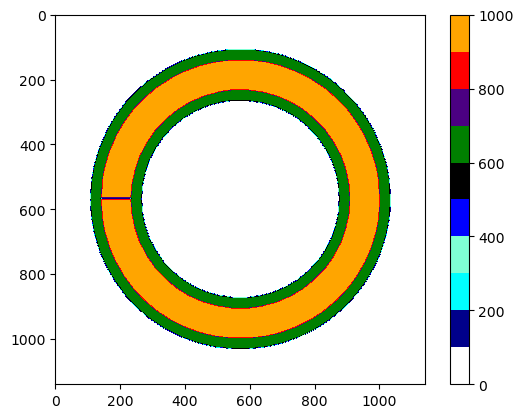

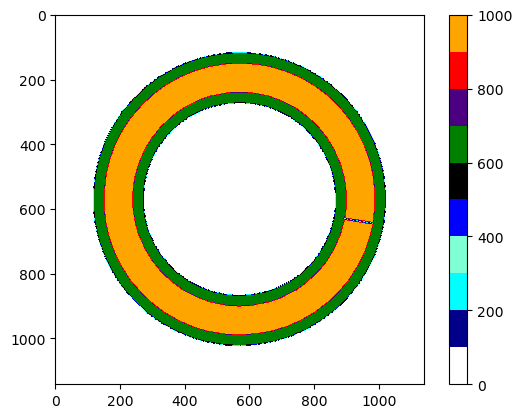

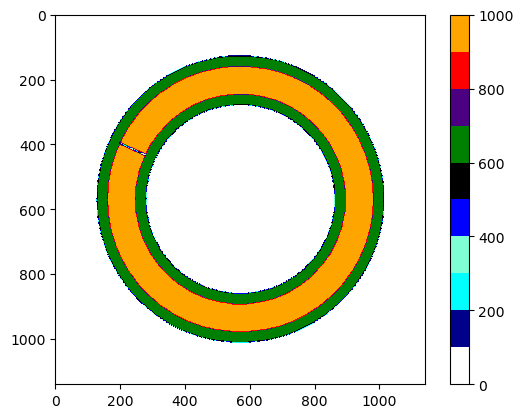

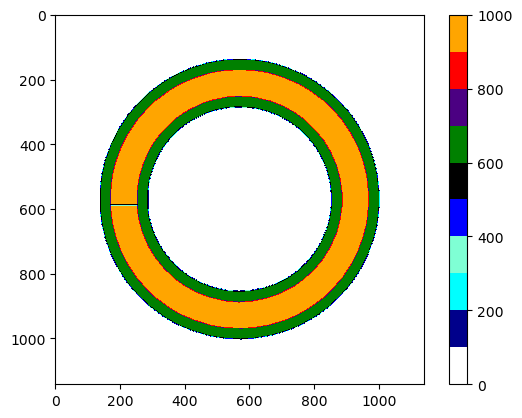

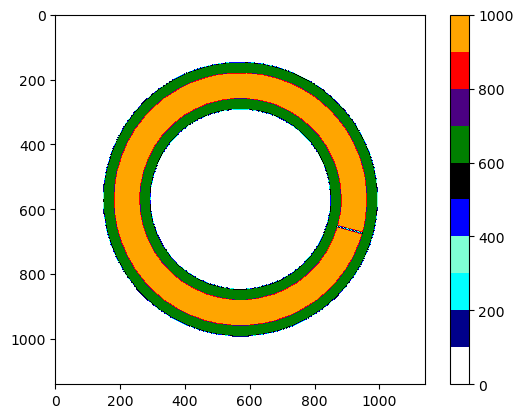

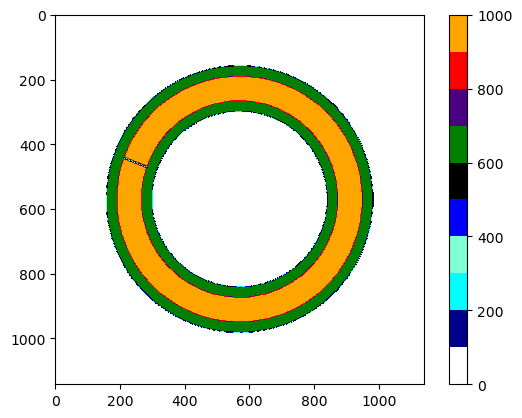

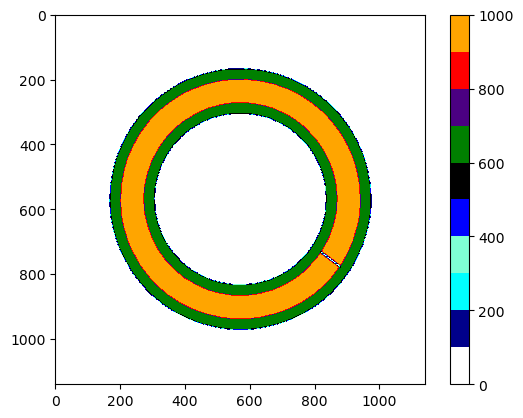

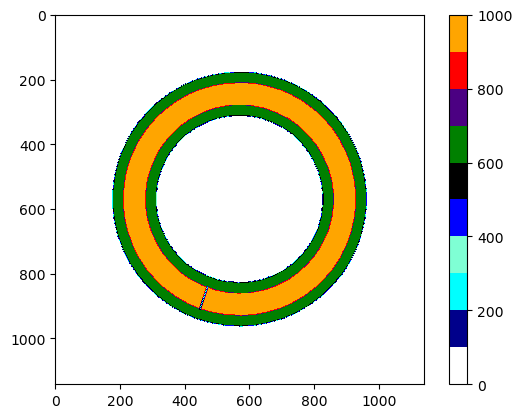

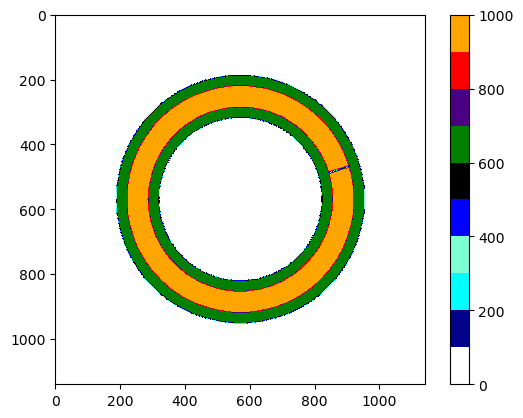

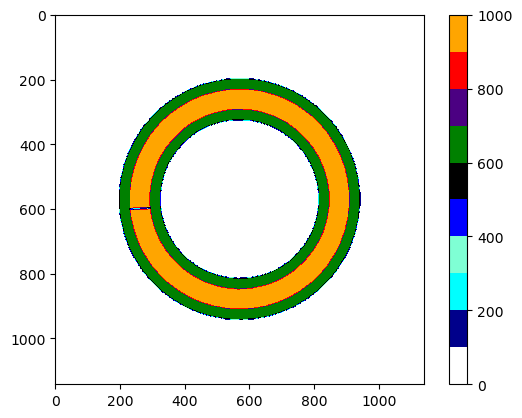

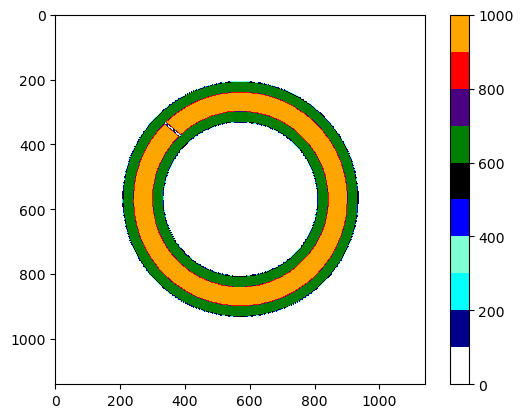

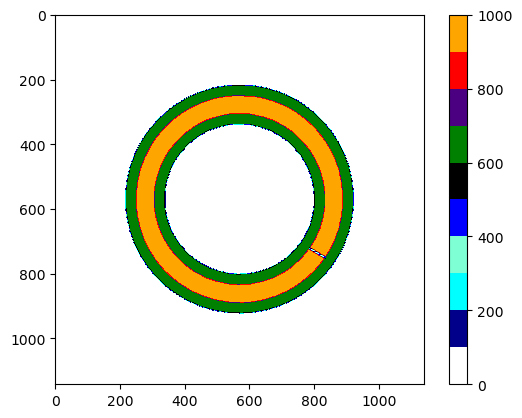

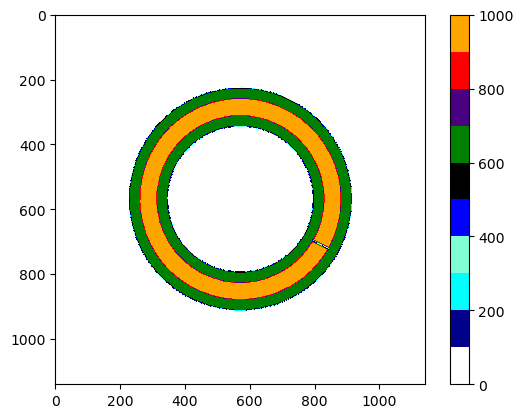

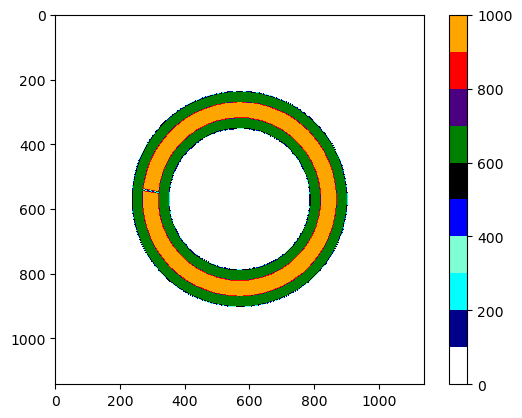

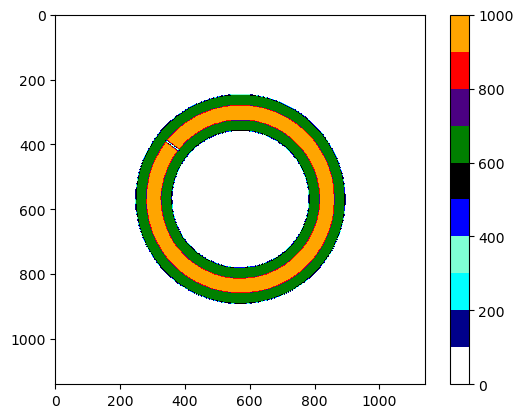

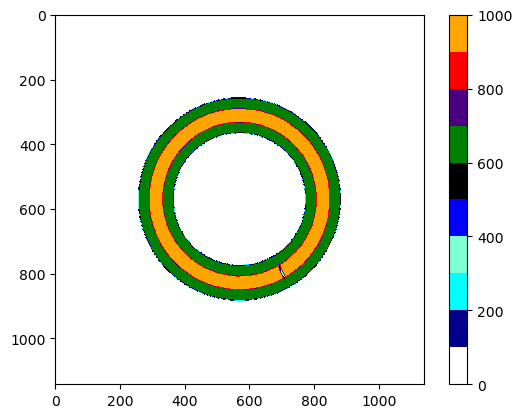

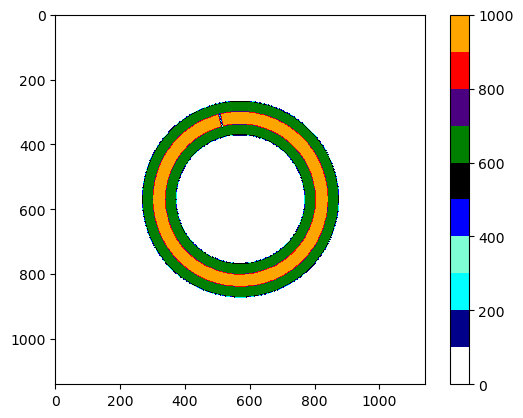

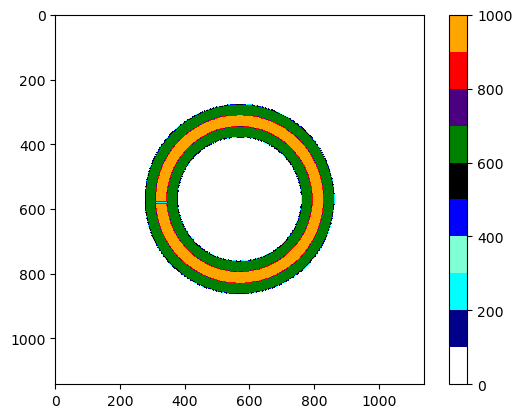

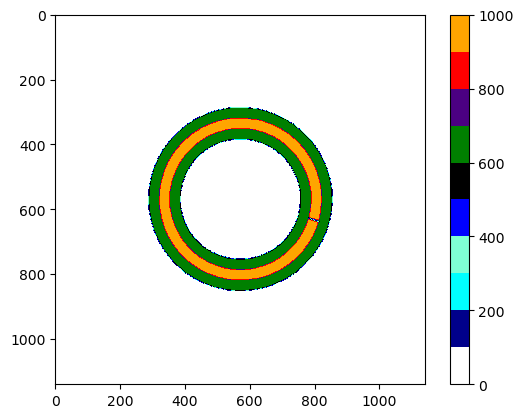

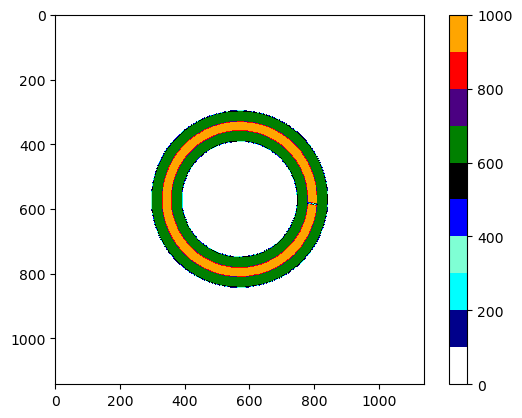

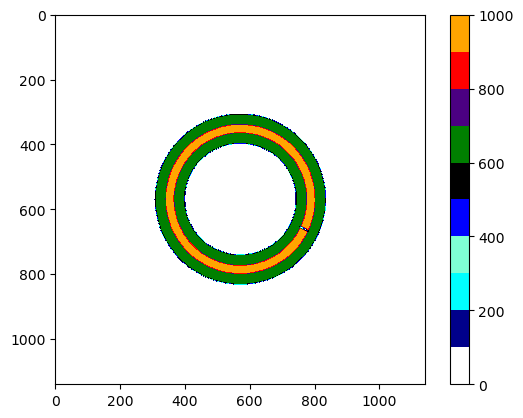

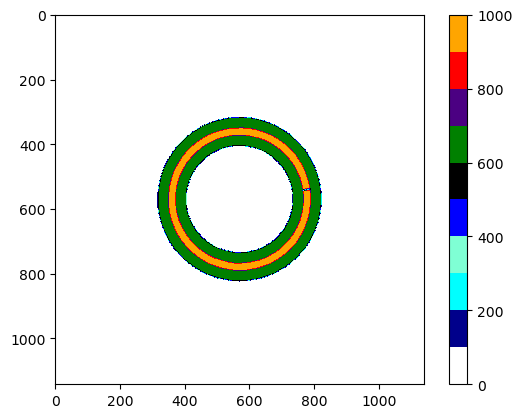

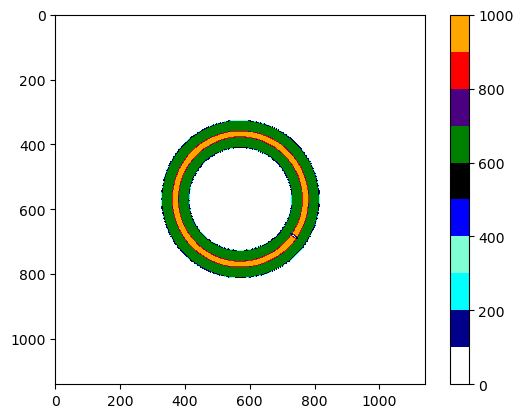

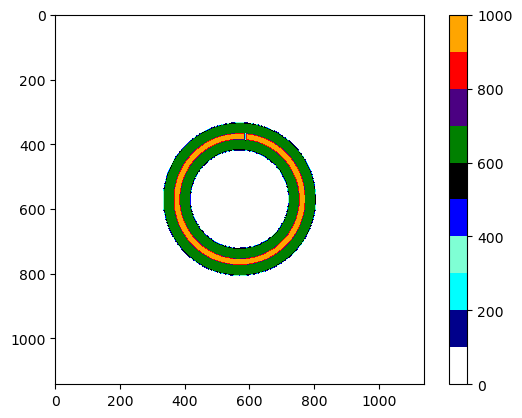

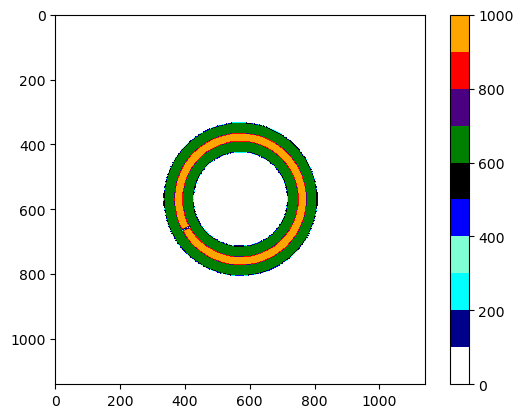

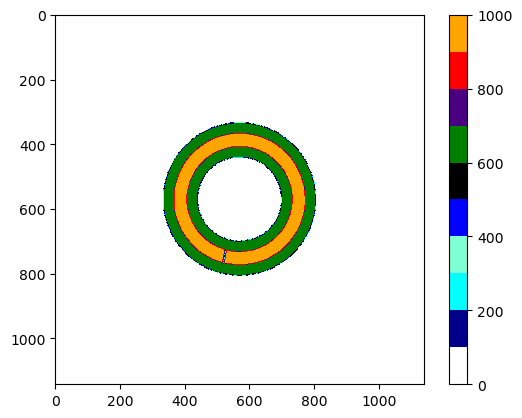

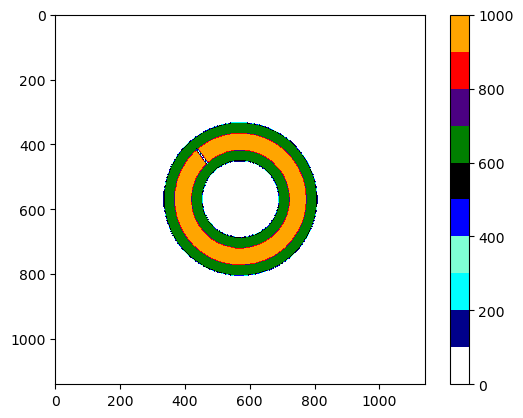

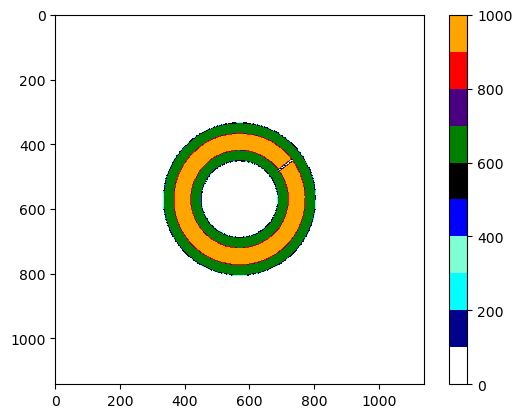

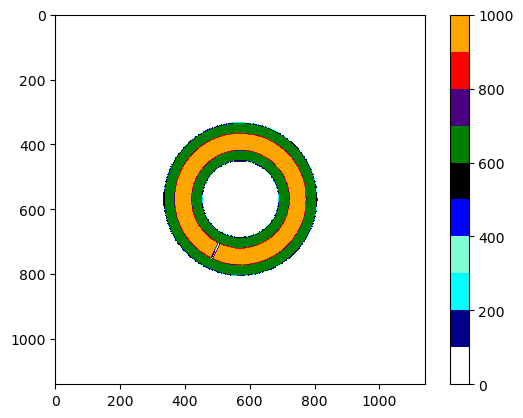

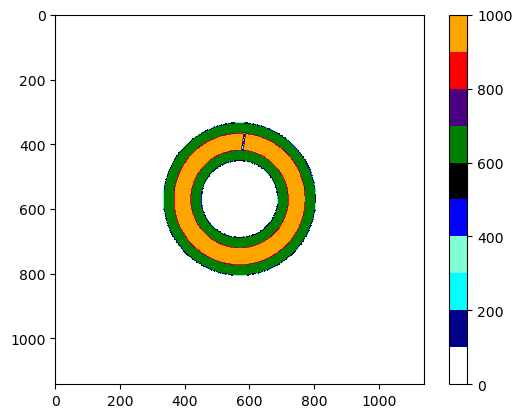

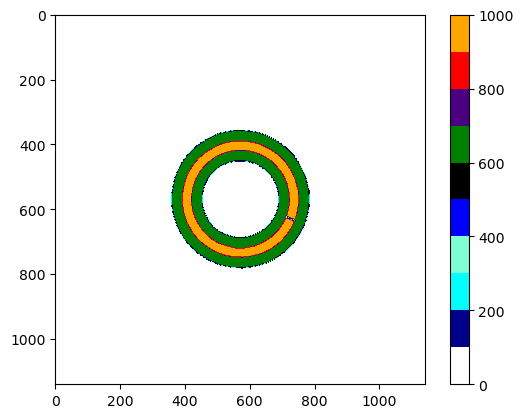

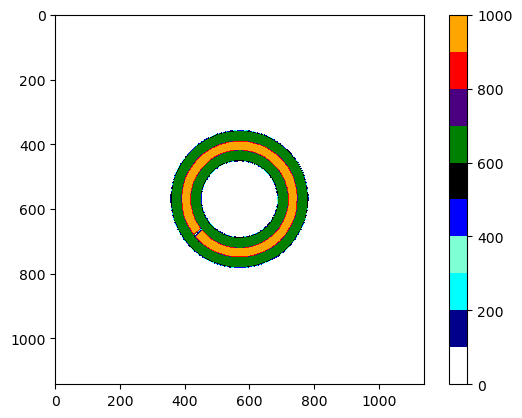

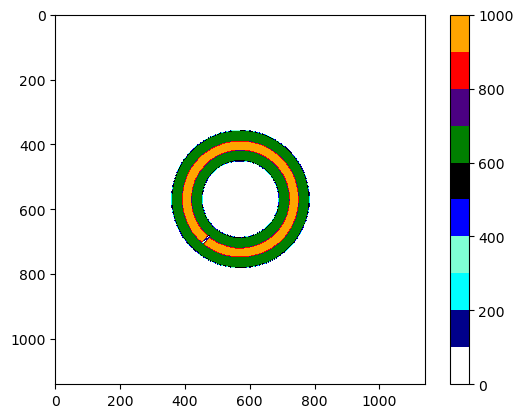

In [26]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        # if i%2 == 1:
        #     img_mapping = it.rotate_img_ccw(img_mapping )
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [27]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.1240987777709961
Total de [Making offset routes] : 4.377093553543091
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.11989951133728027
Total de [Making offset routes] : 3.7053864002227783
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.11056017875671387
Total de [Making offset routes] : 3.8113958835601807
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08781075477600098
Total de [Making offset routes] : 3.594820976257324
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12022733688354492
Total de [Making offset routes] : 3.935515880584717
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12167215347290039
Total de [Making offset routes] : 3.7372865676879883
Making offset routes
salvando imagens 

Rotas de pontes

In [28]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00038170814514160156
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 0.00015211105346679688
Making Crossover bridges routes
sequncia corrigida, b e c trocado
sequncia corrigida, b e c trocado
Total de [Making Crossover bridges routes] : 33.278974294662476
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.24651885032653809
Total de [Camada: L_000] : 33.783007860183716
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.0004048347473144531
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 0.0001876354217529297
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 32.04066753387451
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.1370251178741455
Total de [Camada: L_001] : 32.401620626449585
Camada: L_002
Making Offset bridges routes
Total de 

Rotas de Ziguezague

In [29]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.002099752426147461
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.009422779083251953
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.004780769348144531
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.01294565200805664
salvando grafos
Total de [salvando grafos] : 0.21182727813720703
Total de [Making zigzag routes] : 0.3793768882751465
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.002714872360229492
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.008161783218383789
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.005641460418701172
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0036683082580566406
sa

WEAVING

In [30]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.8364906311035156
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.15259099006652832
Total de [Fase 5 b] : 1.990396499633789
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.9252691268920898
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.15806150436401367
Total de [Fase 5 b] : 2.085343599319458
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.9489121437072754
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.18602347373962402
Total de [Fase 5 b] : 2.1372487545013428
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 2.101066827774048
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.2045454978942871
Total

Rotas de Thin Walls

In [31]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.045851707458496094
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.3365020751953125e-05
Total de [Making thin walls routes] : 0.04659390449523926
Total de [Fase 5] : 0.04695701599121094
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.03780102729797363
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.47955322265625e-05
Total de [Making thin walls routes] : 0.038414955139160156
Total de [Fase 5] : 0.03847479820251465
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.048323869705200195
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.3855438232421875e-05
Total de [Making thin walls routes] : 0.04938459396362305
Total de [Fase 5] : 0.049481868743896484
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.07336688041687012
salvando imagens das rotas
Total de [s

Encontrando o lugar onde será o começo da trilha de cada ilha

In [32]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001661539077758789
Total de [Encontrando ponto de união ext-int] : 0.01617145538330078
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0015799999237060547
Total de [Encontrando ponto de união ext-int] : 0.16157150268554688
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.001687765121459961
Total de [Encontrando ponto de união ext-int] : 0.014462709426879883
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0016613006591796875
Total de [Encontrando ponto de união ext-int] : 0.014404535293579102
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.00249481201171875
Total de [Encontrando ponto de união ext-int] : 0.017389535903930664
Encontrando ponto de união ext-int
salvan

Unificando rotas EXTERNAS nas camadas

In [34]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.9767863750457764
Conectando pontes de Crossover
Value(False)
salto:  [971, 607]
Total de [Conectando pontes de Crossover] : 18.804677963256836
Total de [Conectando rotas externas] : 20.287139654159546
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.3697948455810547
Total de [Fase 6] : 20.658677577972412
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.6108767986297607
Conectando pontes de Crossover
salto:  [734, 203]
Total de [Conectando pontes de Crossover] : 10.268407821655273
Total de [Conectando rotas externas] : 11.286835670471191
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
Total de [salvando imagens das rotas] : 0.5182526111602783
Total de [Fase 6] : 11.806008100509644
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total 

IndexError: list index out of range

Unificando rotas INTERNAS nas camadas

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0020318031311035156
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_043/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.018804073333740234
Total de [Fase 7] : 0.3071906566619873
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0007419586181640625
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_044/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.022960901260375977
Total de [Fase 7] : 0.31694650650024414
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0006327629089355469
rotas internas inexistentes
salvando imagens das rotas
deletado: /L_045/I_000/internal_tree_route
Total de [salvando imagens das rotas] : 0.011404275894165039
Total de [Fase 7] : 0.24582982063293457
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0027611255645751953
rotas internas inexi

Unindo rotas de thin walls

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0010256767272949219
salvando imagens das rotas
deletado: /L_043/I_000/thinwalls_tree_route/sequence
deletado: /L_043/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.1100468635559082
Total de [Fase 8] : 0.17097759246826172
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0026509761810302734
salvando imagens das rotas
deletado: /L_044/I_000/thinwalls_tree_route/sequence
deletado: /L_044/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.10621190071105957
Total de [Fase 8] : 0.16091275215148926
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0008721351623535156
salvando imagens das rotas
deletado: /L_045/I_000/thinwalls_tree_route/sequence
deletado: /L_045/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.109588623046875
Total de [Fase 8] : 0.1495530605316162
Fase 8
Convertendo paredes fi

Unindo todas as rotas

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.0002779960632324219
Conectando todas as partes
layer rotacionada
Total de [Conectando todas as partes] : 0.03382372856140137
salvando imagens das rotas
deletado: /L_043/I_000/island_route
[[593, 789], [561, 789], [560, 788], [547, 788], [546, 787], [540, 787], [539, 786], [533, 786], [532, 785], [526, 785], [525, 784], [521, 784], [520, 783], [518, 783], [517, 782], [515, 782], [514, 781], [512, 781], [511, 780], [509, 780], [508, 779], [506, 779], [505, 778], [503, 778], [502, 777], [500, 777], [499, 776], [496, 776], [495, 775], [492, 775], [491, 774], [489, 774], [488, 773], [487, 773], [486, 772], [485, 772], [484, 771], [483, 771], [482, 770], [481, 770], [480, 769], [479, 769], [477, 767], [476, 767], [475, 766], [474, 766], [473, 765], [471, 765], [470, 764], [469, 764], [468, 763], [467, 763], [466, 762], [465, 762], [464, 761], [463, 761], [462, 760], [461, 760], [460, 759], [459, 759], [457, 

Gerando o Código G

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, p_religamento, p_desligamento, vel_vazio, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [20+8+2+(i*1.5) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               vel_vazio,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_043/I_000
[[593, 789], [561, 789], [560, 788], [547, 788], [546, 787], [540, 787], [539, 786], [533, 786], [532, 785], [526, 785], [525, 784], [521, 784], [520, 783], [518, 783], [517, 782], [515, 782], [514, 781], [512, 781], [511, 780], [509, 780], [508, 779], [506, 779], [505, 778], [503, 778], [502, 777], [500, 777], [499, 776], [496, 776], [495, 775], [492, 775], [491, 774], [489, 774], [488, 773], [487, 773], [486, 772], [485, 772], [484, 771], [483, 771], [482, 770], [481, 770], [480, 769], [479, 769], [477, 767], [476, 767], [475, 766], [474, 766], [473, 765], [471, 765], [470, 764], [469, 764], [468, 763], [467, 763], [466, 762], [465, 762], [464, 761], [463, 761], [462, 760], [461, 760], [460, 759], [459, 759], [457, 757], [456, 757], [454, 755], [453, 755], [451, 753], [450, 753], [448, 751], [447, 751], [444, 748], [443, 748], [440, 745], [439, 745], [436, 742], [435, 742], [432, 739], [431, 739], [428, 736], [427, 736], [417, 726], [417, 725], [402

In [ ]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [ ]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [ ]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [ ]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)